# Интеграция ML-решений: REST-архитектура



Ранее вы уже могли заметить, что создание модели является важным и достаточно сложным этапом разработки продукта с использованием машинного обучения (ML). Практика показывает, что создание инфраструктуры для использования модели оказывается не менее важной задачей. 

Самый простой вариант в этом случае - создание приложения (web-, мобильного или настольного) для доступа к обученной модели. 

Такая программа чаще всего представляет собой простое приложение-обертку с минималистичным интерфейсом, позволяющее загружать данные, обрабатывать их и получать результат, возвращаемый моделью.

Однако зачастую возникает необходимость в использовании ML-модели в рамках крупной системы, содержащей множество компонентов, отвечающих за ту или иную функциональность. В таком случае вам необходимо создать такой компонент, который будет отвечать за получение предсказаний от модели, и который будет совместим с другими компонентами системы.

Для этого потребуется изучить некоторые темы, связанные с web-разработкой и проектированием архитектуры приложений. 

В данном занятии:
- разберем, что такое программные архитектуры **REST** и **API**, зачем они нужны;
- вспомним, как создать свой веб-сервис, предоставляющий **API** для использования ML-модели, 
- разместим этот сервис на хостинге; 
- разберемся, как использовать сервис в сторонних приложениях или компонентах более крупного программного решения.

План:

0. Описание **REST** и **REST API**. Примеры на языке **Python**
1. Создание и обучение ML-модели, написание кода для инференса модели
2. Создание веб-сервиса с помощью **FastAPI**
3. Деплой (развертывание) сервиса на бесплатный хостинг

# 0. Описание REST и REST API. Примеры на языке Python

**_REST (Representational state transfer)_** – это стиль архитектуры программного обеспечения для распределенных систем, чаще всего используемый для построения веб-служб. Термин **REST** был введен в 2000 году Роем Филдингом, одним из авторов протокола **HTTP**. Системы, поддерживающие **REST**, называются **RESTful**-системами.

**REST**-архитектура определяет требования к построению распределенных приложений, направленные на улучшение их масштабируемости и производительности. Среди всех этих требований нас интересуют следующие:
1. Использование модели "клиент - сервер";
2. Единообразие интерфейса.

Еще одно важное понятие, которое требует разбора - **_API_** или **_Application Programming Interface_** (дословно: интерфейс прикладного программирования).

**API** - это набор правил взаимодействия одной программы с другой. Речь в данном случае может идти как о веб-сервисах, так и о внутренних методах операционной системы или методах, предоставляемых какой-либо программной библиотекой.

Например, бибиотека **Tensorflow** предоставляет **API** для таких языков, как **Python**, **С++**, **JavaScript** и **Java** - это значит, что писать и выполнять код, реализующий одни и те же операции, можно на любом из этих языков.

В данном занятии **API** будет рассматриваться только применительно к веб-сервисам. Кроме того, речь будет идти об **API** в контексте **REST**-архитектуры - так называемых **_RESTful API_**.

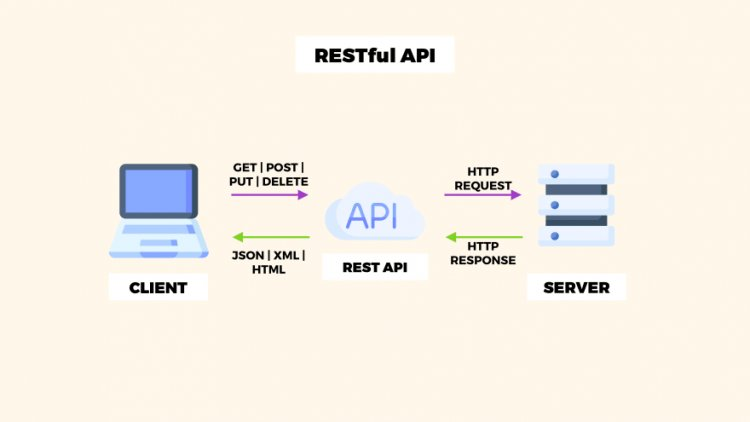

### Разберем работу c протоколом REST более подробно.

**REST API** позволяет использовать для взаимодействия между программами протокол **HTTP** (зашифрованная версия — **HTTPS**), с помощью которого мы получаем и отправляем большую часть информации в интернете.

Протокол **HTTP** довольно прост. Рассмотрим его работу на примере.

Допустим, есть адрес **http://website.com/samples**. 

Он состоит из двух частей: первая — это адрес сайта или сервера, то есть **http://website.com**.

Вторая — адрес ресурса на удаленном сервере, в данном примере — **/samples**.

Набирая в адресной строке URL-адрес **http://website.com/samples**, мы на самом деле отправляем запрос на сервер **website.com** и запрашиваем ресурс под названием **/samples**. «Пойди туда, принеси мне вот это» — и есть **HTTP**-запрос.

Теперь представим, что по адресу **website.com** работает программа, к которой хочет обратиться другая программа. Чтобы программа понимала, какие именно функции нужны, для разных функций используются различные адреса.



### Методы HTTP: основа работы REST API

Чтобы ресурс, который вы запрашиваете, выполнял нужные действия, используются разные способы обращения к нему. Например, если вы работаете с выборками с помощью ресурса **/samples**, то можете их просматривать, редактировать или удалять.

В **API**-системе четыре классических метода:

1. **GET** — метод чтения информации. **GET**-запросы всегда только возвращают данные с сервера, но никогда их не изменяют и не удаляют. Например, в приложении при помощи запроса **GET /samples** вы открываете список выборок данных.

2. **POST** — создание новых записей. В приложении запрос **POST /samples** будет использоваться для создания новой выборки.

3. **PUT** — редактирование записей. Например, запросом **PUT /samples** вы исправляете выборку.

4. **DELETE** — удаление записей. В нашем приложении запрос **DELETE /samples** удаляет старые или ненужные выборки.

Таким образом, вы получаете четыре функции, которые программа может использовать при обращении к данным одного и того же ресурса, в примере — ресурса для работы со выборками **/samples**.

### Для чего используют REST API

Архитектура **REST API** — самое популярное решение для организации взаимодействия между различными программами. Так произошло, поскольку протокол **HTTP** реализован во всех языках программирования и всех операционных системах, в отличие от проприетарных протоколов.

Чаще всего **REST API** применяют:

- Для связи мобильных приложений с серверными;
- Для построения микросервисных серверных приложений. Это архитектурный подход, при котором большие приложения разбиваются на много маленьких частей;
- Для предоставления доступа к программам сторонних разработчиков. Например, **Stripe API** позволяет программистам встраивать обработку платежей в свои приложения.

### Что еще важно знать при работе с REST API

Каждый запрос **REST API** сообщает о результатах работы числовыми кодами — **_статусами HTTP_**.

Например, редактирование записи на сервере может отработать успешно (код **200**), может быть заблокировано по соображениям безопасности (код **401** или **403**), а то и вообще сломаться в процессе из-за ошибки сервера (код **500**). Числовые коды ошибок — аналог пользовательских сообщений о результатах работы программы.

Также **REST API** позволяет обмениваться не только текстовой информацией. С помощью этого инструмента можно передавать файлы и данные в специальных форматах: **_XML, JSON, Protobuf_**.

### Шаблоны использования REST API

Соглашения об использовании тех или иных **HTTP**-методов для различных функций в **REST** называются **_шаблонами REST_**, или **_REST-паттернами_**.

В частности, разные паттерны по-разному рассматривают методы **POST** и **PUT**. Если **PUT** предназначен для создания, замены или редактирования, то для **POST** требования гораздо менее строги. Поэтому пример ниже будет правильным и в таком виде, и если поменять местами **POST** и **PUT**.

Вообще говоря, **POST** может использоваться одновременно для всех действий изменения:

- **POST /sample/** – добавление выборки (данные в теле запроса)

- **POST /sample/3** – изменение конкретной выборки (данные в теле запроса)

- **POST /sample/3** – удаление конкретной выборки (тело запроса пустое)

Это позволяет иногда обходить неприятные моменты, связанные с использованием **PUT** и **DELETE**. 

Из приведенного примера можно видеть, что составленные определенным образом шаблоны (паттерны) **REST** позволяют обходится только одним типом запроса, например, **POST**. Остается лишь правильно сформировать тело запроса с командами и данными.


### REST API и PYTHON

Стандартная библиотека языка **Python** имеет ряд готовых модулей по работе с **HTTP**.

- **urllib**

- **httplib**

Более низкий уровень обслуживает модуль **socket**.

Но у всех этих модулей есть существенный недостаток - неудобство работы. Многие программисты любят **Python** за его элегантность и простоту, поэтому и был создан модуль, призванный решить эту проблему. Модуль называется **_requests_** (или "HTTP для людей"). 

Рассмотрим реализацию основных методов **REST API** с использованием модуля **requests**.


Попробуем получить веб-страницу с помощью **GET**-запроса. В этом примере обратимся к общей ленте событий **GitHub**:

In [ ]:
import requests
r = requests.get('https://api.github.com/events')

Мы получили объект **Response** с именем **r**. С помощью этого объекта можно получить всю необходимую информацию.

Прикладной интерфейс (API) модуля **requests** прост: типы запросов **HTTP** очевидны. Ниже приведен пример вызова запроса **POST**:

In [ ]:
r = requests.post('https://httpbin.org/post', data = {'key':'value'})  

Другие типы запросов **HTTP**, такие как **PUT**, **DELETE**, **HEAD** и **OPTIONS** выполняются так же легко:

In [ ]:
r = requests.put('https://httpbin.org/put', data = {'key':'value'})  
r = requests.delete('https://httpbin.org/delete')  
r = requests.head('https://httpbin.org/get')  
r = requests.options('https://httpbin.org/get')  

### Передача параметров в URL

Часто может понадобиться отправить какие-то данные в строке запроса **URL**. Если вы настраиваете **URL** вручную, то эти данные будут представлены в строке виде пар "ключ=значение" после знака вопроса. 

Например, **https://httpbin.org/get?key=val**. 

Модуль **requests** позволяет передать эти аргументы в качестве словаря, используя аргумент **params**. Если вы хотите передать `key1=value1` и `key2=value2` ресурсу **https://httpbin.org/get**, используйте  следующий код:

In [ ]:
payload = {'key1': 'value1', 'key2': 'value2'}  
r = requests.get('https://httpbin.org/get', params=payload)
print(r.url) 
# https://httpbin.org/get?key2=value2&key1=value1

https://httpbin.org/get?key1=value1&key2=value2


В качестве значения переменных можно передавать и списки:

In [ ]:
payload = {'key1': 'value1', 'key2': ['value2', 'value3']}  
r = requests.get('https://httpbin.org/get', params=payload)  
print(r.url)  
# https://httpbin.org/get?key1=value1&key2=value2&key2=value3 

https://httpbin.org/get?key1=value1&key2=value2&key2=value3


### Передача параметров в запросе POST

А если надо отправить большой набор различных данных? Здесь пригодится формат данных **JSON**.

In [ ]:
url = 'https://api.github.com/some/endpoint'  
payload = {'some': 'data'}  
r = requests.post(url, json=payload) 


### Содержимое ответа (объект Response)

Вы можете прочитать содержимое ответа сервера на отправленный запрос.

На примере ленты событий **GitHub** это выглядит так:

In [ ]:
import requests
r = requests.get('https://api.github.com/events')
r.text
#'[{"repository":{"open_issues":0,"url":"https://github.com/...


'[{"id":"21088048423","type":"PushEvent","actor":{"id":3195906,"login":"adamhsparks","display_login":"adamhsparks","gravatar_id":"","url":"https://api.github.com/users/adamhsparks","avatar_url":"https://avatars.githubusercontent.com/u/3195906?"},"repo":{"id":225693680,"name":"ropensci/chirps","url":"https://api.github.com/repos/ropensci/chirps"},"payload":{"push_id":9526020664,"size":5,"distinct_size":2,"ref":"refs/heads/devel","head":"9111cbd5b1804e8c2049b3417fd224915c085cae","before":"21bf1bd100e7166a130048b2c9c1a232893c4046","commits":[{"sha":"6ad41396a438738c75ea18f6fcc0be5fab2f92f2","author":{"email":"adamhsparks@icloud.com","name":"Adam Sparks"},"message":"update .gitignore","distinct":false,"url":"https://api.github.com/repos/ropensci/chirps/commits/6ad41396a438738c75ea18f6fcc0be5fab2f92f2"},{"sha":"5824e86d10e91d25d6c9aee80507067cc3b39acd","author":{"email":"adamhsparks@icloud.com","name":"Adam Sparks"},"message":"Try using the tic\'s own tic.yml file","distinct":false,"url":"h

Модуль **requests** будет автоматически декодировать содержимое ответа сервера. Большинство кодировок **unicode** декодируются без проблем.

Когда вы делаете запрос, **requests** пытается определить кодировку на основании заголовков **HTTP**. Та же кодировка текста используется при обращении к **r.text**.

Свойство **r.encoding** позволяет узнать, какую кодировку использует **requests** и при необходимости сменить её на другую.

### Содержимое ответа в JSON

Если вы работаете с данными в формате **JSON**, воспользуйтесь встроенным декодером **JSON**:

In [ ]:
import requests
r = requests.get('https://api.github.com/events')
r.json()
# [{'repository': {'open_issues': 0, 'url': 'https://github.com/...


[{'actor': {'avatar_url': 'https://avatars.githubusercontent.com/u/3195906?',
   'display_login': 'adamhsparks',
   'gravatar_id': '',
   'id': 3195906,
   'login': 'adamhsparks',
   'url': 'https://api.github.com/users/adamhsparks'},
  'created_at': '2022-04-03T22:21:31Z',
  'id': '21088048423',
  'org': {'avatar_url': 'https://avatars.githubusercontent.com/u/1200269?',
   'gravatar_id': '',
   'id': 1200269,
   'login': 'ropensci',
   'url': 'https://api.github.com/orgs/ropensci'},
  'payload': {'before': '21bf1bd100e7166a130048b2c9c1a232893c4046',
   'commits': [{'author': {'email': 'adamhsparks@icloud.com',
      'name': 'Adam Sparks'},
     'distinct': False,
     'message': 'update .gitignore',
     'sha': '6ad41396a438738c75ea18f6fcc0be5fab2f92f2',
     'url': 'https://api.github.com/repos/ropensci/chirps/commits/6ad41396a438738c75ea18f6fcc0be5fab2f92f2'},
    {'author': {'email': 'adamhsparks@icloud.com', 'name': 'Adam Sparks'},
     'distinct': False,
     'message': "Try usin

Если декодирование в **JSON** не удалось, `r.json()` вызовет ошибку (исключение). Например, если сервер ответил кодом **204** (No Content), либо ответ содержит неправильный по формату **JSON**, то попытка обращения к `r.json()` приведет к ошибке **ValueError: No JSON object could be decoded**.

Следует иметь в виду, что успешный вызов `r.json()` не означает, что ответ сервера был успешным. Некоторые серверы могут возвращать объект **JSON** и при неудачном ответе (например, сведения об ошибке **HTTP 500**). Такой объект **JSON** будет декодирован при вызове `r.json()` и успешно возвращен. Чтобы проверить, успешен ли был запрос, используйте `r.raise_for_status()` или проверьте содержимое **r.status_code**.

# 1. Создание и обучение ML-модели, написание кода для инференса (режима предсказания) модели

Для дальнейшей работы воспользуемся моделью, изученной на одном из первых занятий, для классификации автомобилей по трем маркам: **Ferrari**, **Renault** и **Mercedes**.

В рамках данного этапа работы мы должны создать файл с кодом для:
- инициализации модели;
- загрузки ее весов;
- предобработки изображения;
- подачи его в сеть и получения предсказания.

Также нам нужно загрузить файл с весами в ноутбук для последующей отправки на удаленный сервер.

Загрузим модель из облака:

In [ ]:
import gdown

# Загрузка файла модели из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l16/cars3.h5', None, quiet=True)

'cars3.h5'

Создадим файл с кодом для инициализации модели, загрузки весов, предобработки изображения и инференса (режима предсказания) модели:

In [ ]:
predict_file = '''

from tensorflow.keras.models import load_model
import numpy as np
from io import BytesIO
from PIL import Image 

INPUT_SHAPE = (96, 54, 3)

model = load_model('cars3.h5')  # Инициализация модели


def process(image_file):
    
    # Открытие обрабатываемого файла
    image = Image.open(BytesIO(image_file)) 

    # Изменение размера изображения в соответствии со входом сети
    resized_image = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0])) 

    # Подгонка формы тензора для подачи в модель
    array = np.array(resized_image)[np.newaxis, ...] 

    # Запуск предсказания
    prediction_array = model.predict(array)[0] 

    # Возврат предсказания сети в виде текстовой переменной, хранящей список
    return str(list(prediction_array))
'''

# Сохранение кода в файл
with open('predict.py', 'w') as file:
    file.write(predict_file)

# 2. Создание веб-сервиса с помощью FastAPI

В данном разделе будет создан веб-сервис, предоставляющий API для получения предсказания из модели нейронной сети.

Существует большое количество веб-фреймворков, позволяющих это сделать, например, **Flask** или **Django**. Однако последние содержат слишком много функций для разработки веб-приложений, которые нам просто не понадобятся (мы не будем работать с веб-страницами, обращаться к базам данных и т.п.). 

Поэтому воспользуемся специализированным веб-фреймворком, который был разработан специально для создания API - **_FastAPI_**. 


Для начала разберемся, как создавать веб-сервисы с помощью **FastAPI** и обращаться к созданному API. Также в конце раздела сохраним наши наработки в файл для будущего его размещения на сервере хостинга.

[Документация FAST API](https://fastapi.tiangolo.com/)

Установим библиотеку **FastAPI** и вспомогательные компоненты:

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install python-multipart

     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 10.9 MB 9.7 MB/s 
     |████████████████████████████████| 58 kB 4.1 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=a24a7fed024d5651f433157d295d8bb187bf9696e115d622377f44c2fd16dcda
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built python-multipart


Создадим файл с тестовым API:

In [ ]:
main_file = '''from fastapi import FastAPI

app = FastAPI()

@app.get("/test")
def read_root():
    return {"Hello": "World"}
'''

with open('main.py', 'w') as file:
    file.write(main_file)

Запустим http-сервер **uvicorn** с указанием приложения, которое будет запускаться (**app** из файла **main.py**):

In [ ]:
!nohup uvicorn main:app --reload &
# nohup и & - прописываются для запуска процесса в фоне (чтобы не блокировать Colab)
# параметр --reload позволяет автоматически перезапускать uvicorn при изменениях в файле main.py

nohup: appending output to 'nohup.out'


Логи http-сервера теперь выводятся в файл **nohup.out**:

In [ ]:
!cat nohup.out

Сделаем пробный запрос к созданнму эндпойнту (одному из адресов для запросов через API):

In [ ]:
import requests

In [ ]:
r = requests.get('http://127.0.0.1:8000/test')
print(r.status_code)
print(r.text)

200
{"Hello":"World"}


При возникновении ошибки просто перезапустите ячейку.

Создадим новый эндпойнт, который будет принимать файл с изображением и возвращать результат:

In [ ]:
main_file = '''from fastapi import FastAPI, File
from predict import process

app = FastAPI()


@app.post("/predict")
async def create_file(file: bytes = File(...)):
    return {"result": process(file)}
'''

with open('main.py', 'w') as file:
    file.write(main_file)

Отправим изображение на эндпойнт для классификации:

In [ ]:
# Загрузка тестового изображения:
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l16/auto.jpg', None, quiet=True)

'auto.jpg'

In [ ]:
files = {'file': open('auto.jpg','rb')}
r = requests.post('http://127.0.0.1:8000/predict', files=files)
print(r.text)

{"result":"[0.0, 1.0, 0.0]"}


Проверим текст ответа на запрос (мы должны получить вероятности принадлежности изображения к каждому из трех классов):

In [ ]:
class_names = ['Ferrari', 'Mercedes', 'Renault']

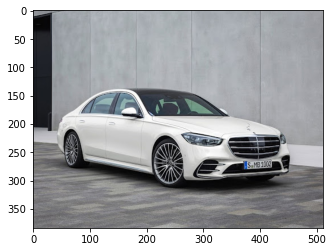

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image 

plt.imshow(Image.open('auto.jpg'))
plt.show()

Создадим файл для запуска веб-службы:

In [ ]:
proc_file = 'web: uvicorn main:app --host=0.0.0.0 --port=${PORT:-5000}'

with open('Procfile', 'w') as file:
    file.write(proc_file)

Создадим файл зависимостей. В нем перечисляются требуемые пакеты **Python** и их версии:

In [ ]:
requirements_file = '''

fastapi==0.68.1
tensorflow-cpu==2.8.0
uvicorn==0.15.0
Pillow==7.1.2
python-multipart==0.0.5

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

Удалим лишние файлы, по умолчанию находящиеся в текущей папке Colab:

In [ ]:
!rm -rf sample_data

# 3. Деплой (развертывание) сервиса на бесплатный хостинг

Используем сервис **Heroku** так же, как в предыдущем занятии:

[Создание простого веб-сервера и настройка параметров работы
](https://colab.research.google.com/drive/1YHmT3lrgcX0tc5UBAF1EpardAuaEjj3F?usp=sharing)

## Регистрация аккаунта на Heroku

Пройдите регистрацию аккаунта на Heroku по данной [ссылке](https://signup.heroku.com/dc).<br>
Этот шаг можно пропустить, если у вас уже есть аккаунт.<br>
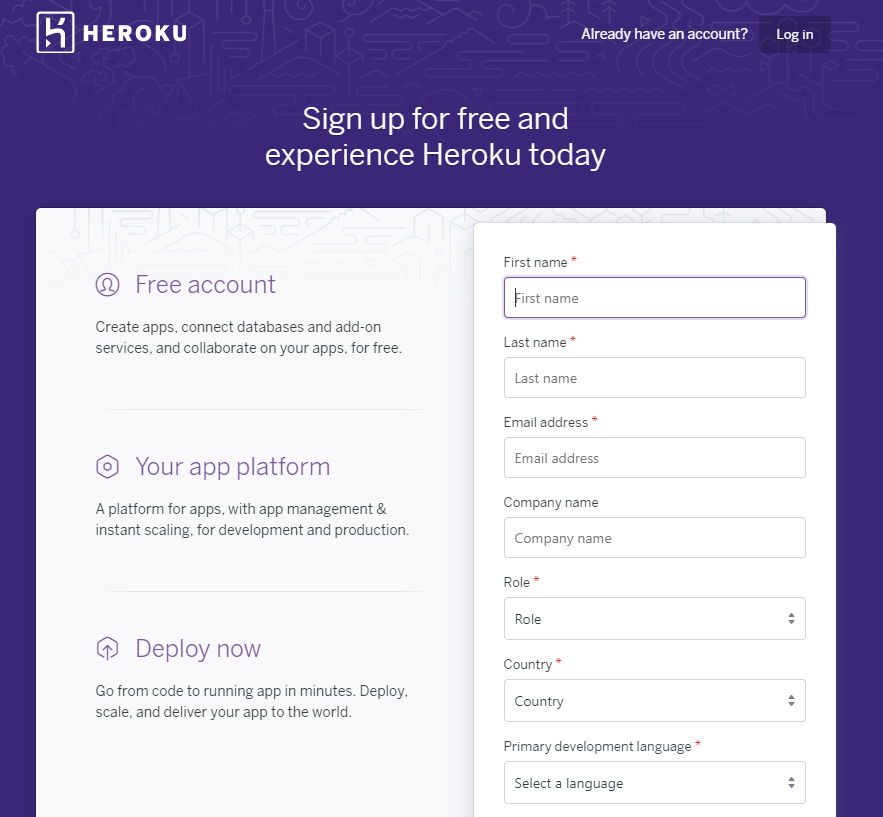

## Установка **Git** и **Heroku CLI**

Шаг с установкой **Git** можно пропустить, так как виртуальные машины Google Colab уже содержат предустановленный пакет **Git**.

Проверим наличие и версию **Git**:

In [ ]:
!git --version

git version 2.17.1


Зададим имя пользователя и e-mail для **Git**:

In [ ]:
# Укажите свои данные
!git config --global user.email "seregaak3@gmail.com"
!git config --global user.name "serega"

Установим **Heroku CLI** (интерфейс командной строки):

In [ ]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0   6623      0 --:--:-- --:--:-- --:--:--  6623
+ dpkg -s apt-transport-https
+ echo 
+ apt-get update
+ apt-get install -y apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ apt-key add -
+ curl https://cli-assets.heroku.com/apt/release.key
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100  5393  100  5393    0     0  23145      0 --:--:-- --:--:-- --:--:-- 23145
+ apt-get update
+ apt-get install -y heroku
 ›   Warning: Our terms of service have changed: 
 ›   https://dashboard.heroku.com/t

Проверим установку **Heroku CLI**:

In [ ]:
!heroku --version

heroku/7.60.1 linux-x64 node-v14.19.0


Для авторизации в Heroku необходимо перейти на [страницу с настройками Heroku](https://dashboard.heroku.com/account), скопировать **API Key** и создать файл **.netrc** в домашней папке с указанием логина и скопированного токена:

In [ ]:
LOGIN = 'seregaak3@gmail.com'  # Укажите свой логин
API_KEY = 'xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx'  # Укажите свой API-key
           

auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

## Отслеживание проекта в **Git**

Перед развертыванием приложения в **Heroku** вам необходимо инициализировать локальный репозиторий **Git** и зафиксировать в нем код приложения:

In [ ]:
!git init
!git add .
!git commit -m "My first commit"

Initialized empty Git repository in /content/.git/
[master (root-commit) 947f21e] My first commit
 24 files changed, 712 insertions(+)
 create mode 100644 .config/.feature_flags_config.yaml
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/.metricsUUID
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2022.03.23/14.20.51.700340.log
 create mode 100644 .config/logs/2022.03.23/14.21.15.158122.log
 create mode 100644 .config/logs/2022.03.23/14.21.37.874736.log
 create mode 100644 .config/logs/2022.03.23/14.21.47.434153.log
 create mode 100644 .config/logs/2022.03.23/14.22.10.115472.log
 create mode 100644 .config/logs/2022.03.23/14.22.11.024461.log
 create mode 100644 Procfile
 create mode 100644 __

Код приложения теперь отслеживается в локальном репозитории **Git**. Он еще не отправлен на удаленный сервер.

## Создание удаленного репозитория **Heroku**

**Git remotes** - это версии вашего репозитория, которые находятся на других серверах. Вы развертываете свое приложение, отправляя его код на специальный удаленный сервер **Heroku**, который предоставит доступ к приложению по сети.

Команда `heroku create` создает новое пустое приложение на **Heroku** вместе с соответствующим репозиторием **Git**. Если вы запустите эту команду из корневого каталога вашего приложения, то пустой репозиторий **Heroku Git** автоматически станет удаленным для локального репозитория.

In [ ]:
!heroku create

Creating app... ⣾ 
⣽⣻⢿⡿⣟⣯Creating app... done, ⬢ warm-wave-73221
https://warm-wave-73221.herokuapp.com/ | https://git.heroku.com/warm-wave-73221.git


Вы можете использовать команду `git remote`, чтобы проверить, что для вашего приложения установлен удаленный репозиторий с именем **heroku**:

In [ ]:
!git remote -v

heroku	https://git.heroku.com/warm-wave-73221.git (fetch)
heroku	https://git.heroku.com/warm-wave-73221.git (push)


Для того, чтобы разорвать текущее соединение с удаленным репоизорием используйте команду:

        !git remote rm heroku

## Развертывание кода

Для развертывания приложения в **Heroku** нужно использовать команду `git push`, чтобы отправить код из главной или основной ветки локального репозитория на удаленный сервер **heroku**:

In [ ]:
!git push heroku master

Counting objects: 31, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (23/23), done.
Writing objects: 100% (31/31), 903.75 KiB | 12.38 MiB/s, done.
Total 31 (delta 3), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Determining which buildpack to use for this app
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the buildpack default: python-3.10.4
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> Installing python-3.10.4
remote: -----> Installing pip 21.3.1, setuptools 57.5.0 and wheel 0.37.0
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote:        Collecting fastapi==0.68.1
remote:          Downloading fastapi-0.68.1-py3-none-any.whl (52 kB)
remote:        Collecting tensorflow-cpu==2.8.0
remote:          Dow

Используйте эту же команду всякий раз, когда хотите развернуть последнюю зафиксированную версию вашего кода в **Heroku**.

Обратите внимание, что **Heroku** развертывает только тот код, который вы отправляете в ветку **master** или **main**. Перенос кода в другую ветку удаленного репозитория **Heroku** не даст никакого эффекта.

## Проверка результа

Отправим запрос с изображением на удаленный сервер. Укажем в запросе URL, полученный на предыдущем шаге:

In [ ]:
files = {'file': open('auto.jpg','rb')}
r = requests.post('https://warm-wave-73221.herokuapp.com/predict', files=files)
print(r.status_code)

200


Проверим результат предсказания:

In [ ]:
r.json()

{'result': '[0.0, 1.0, 0.0]'}

Поздравляем!
Вы создали веб-сервис с собственным API и разместили его в интернете!